In [5]:
from os import walk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
files = []
path  = "data/"

for (dirpath,dirnames,filenames) in walk(path):
    files.extend(filenames)
    break

files.sort()
year = [i[:-4] for i in files]


In [7]:
data = [pd.read_csv(path+datacsv, sep=";", on_bad_lines="skip") for datacsv in files]

In [461]:
VEHICLE_CATEGORY = "Catégorie véhicule"
TYPE_ACCIDENT    = "Type Accident - Libellé"

data_category = [i.groupby(VEHICLE_CATEGORY).value_counts() for i in data]
data_typeaccident = [i.groupby(TYPE_ACCIDENT)[VEHICLE_CATEGORY].value_counts() for i in data]


In [462]:
data = [[i.to_numpy(),i.index.to_numpy()] for i in data_typeaccident]

In [463]:
ac_pyear= [i[0] for i in data]
ac_pyear_index = [i for i in data]


In [464]:
# filter accidents per year by vehicle category in dataframe list
def filter_accident_by_vehicle_category_per_year(dataframe_list, vehicle_category):
    return [filter_accident_by_vehicle_category(i, vehicle_category) for i in dataframe_list]
    
def filter_accident_by_vehicle_category(dataframe, vehicle_category):
    return dataframe[dataframe[VEHICLE_CATEGORY] == vehicle_category]

In [466]:
ac_pyear_vu = [i["VU"] for i in data_category]

#av_pyear_vu = [i.value_counts() for i in ac_pyear_vu]

In [481]:
# calculate describe statistics for each year
ac_pyear_vu_describe = [i.describe() for i in ac_pyear_vu]

In [473]:
#normalize data ac_pyear_vu_describe
ac_pyear_vu_describe_norm = [i/i.sum() for i in ac_pyear_vu_describe]

In [ ]:

# plot line between maximum accidents per year
def plot_max_accident_per_year(dataframe, vehicle_category):
    max_accident = [i.max() for i in dataframe]
    plt.plot(year, max_accident, label=vehicle_category)


plot_max_accident_per_year(ac_pyear_vu, "VU")
#plt.title("Accidents per year")
#plt.bar(year, [i.sum() for i in ac_pyear])



In [399]:
# show histogram of accidents per year from dataframe
def show_histogram_accident_per_year(dataframe):
    plt.bar(year, dataframe.sum())




In [400]:
#group by type od accident 
def group_by_type_accident(dataframe):
    #count number of accidents
    return dataframe.groupby(TYPE_ACCIDENT).value_counts()


In [401]:

ac_p_year_vu_acc = [group_by_type_accident(i) for i in ac_pyear_vu]


In [402]:
# show histogram of number of of accidents per year from dataframe
def show_histogram_accident_per_year(dataframe):
    # count number of accidents per year
    accidents_per_year = dataframe.sum()
    # show histogram
    plt.bar(year, accidents_per_year)



In [494]:
# obtain age véhicle distribution statistics from dataframe
def get_age_vehicle_distribution(dataframe):
    return dataframe.describe()

# get_vehicle_distribution
def get_vehicle_distribution(dataframe):
    return dataframe.value_counts()
    
# get vehicle distribution statistics from a list of pandas series
def get_vehicle_distribution_statistics(dataframe_list):
    # get statistics for each dataframe
    statistics = [get_vehicle_distribution(i) for i in dataframe_list]
    # get index of each dataframe
    index = [i.index for i in dataframe_list]
    # create a dataframe with statistics and index
    return pd.DataFrame(statistics, index=index)

In [496]:
stats_vu = get_vehicle_distribution_statistics(ac_pyear_vu)

In [497]:
stats_vu_norm = stats_vu/stats_vu.sum()

In [500]:
# group dataframe by accident type
def group_by_accident_type(dataframe):
    return dataframe.groupby(TYPE_ACCIDENT).value_counts()



In [514]:
actype_vu = [group_by_accident_type(i) for i in ac_pyear_vu]

In [552]:
#plot in the same graphic the number of accidents per year 
def plot_accident_per_year_by_type(dataframe_list):
    # get number of accidents per year
    accidents_per_year = [i for i in dataframe_list]
    column_name = [i.index.tolist() for i in dataframe_list]
    # plot
    plt.plot(year, [i.values for i in accidents_per_year])
    # obtain strings in tuple column_name
    column_name = [i for j in column_name for i in j]

    plt.legend(column_name)

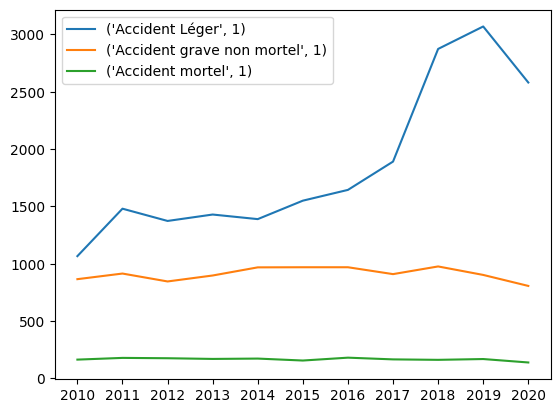

In [553]:
#get column names from dataframe


plot_accident_per_year_by_type(actype_vu)

In [537]:
actype_vu[0].index.tolist()

[('Accident Léger', 1),
 ('Accident grave non mortel', 1),
 ('Accident mortel', 1)]

In [404]:
# get describe statistics for each dataframe in dataframe_list
def get_describe_statistics(dataframe_list):
    # get statistics for each dataframe
    statistics = [i.describe() for i in dataframe_list]
    # get index of each dataframe
    index = [i.index for i in dataframe_list]
    # create a dataframe with statistics and index
    temp = []
    for n in range(len(statistics)):
        temp.append(pd.DataFrame(statistics[n], index=index[n]))
    return temp



In [405]:
stats = [i.describe() for i in ac_pyear_vu]

#stats to array
stats = np.array([i.to_numpy() for i in stats])

In [406]:
# calculate stats differences between values in stats list
def calculate_stats_differences(stats):
    # calculate differences between values in stats list
    differences = []
    for i in range(len(stats)-1):
        differences.append(stats[i+1]-stats[i])
    return differences


In [407]:
# calculate statsdiff %
def calculate_stats_diff_percentage(stats):
    # calculate differences between values in stats list
    differences = []
    for i in range(len(stats)-1):
        differences.append((stats[i+1]-stats[i])/stats[i])
    return differences


In [417]:
ac_pyear_vu[0].describe()

,Année,Age véhicule
count,8.000000,8.000000
mean,0.125000,0.125000
std,0.095783,0.347042
min,0.000000,0.000000
25%,0.109632,0.000722
50%,0.109632,0.001036
75%,0.109632,0.004075
max,0.342206,0.983837


In [409]:
stats_per = calculate_stats_diff_percentage(stats)

#plot statistics stats_per with stats labels
# set labels as dataframe describe index
labels = ac_pyear_vu[0].describe().index.to_numpy()
    

/var/folders/fv/fknw459x4rbfbgsl8dz37yvm0000gn/T/ipykernel_7373/1829331351.py:6: RuntimeWarning: invalid value encountered in divide
  differences.append((stats[i+1]-stats[i])/stats[i])


In [382]:
# plot stats chart with labels
def plot_stats_chart(stats, labels):
    # plot stats chart
    plt.plot(year, stats)
    # set labels
    plt.xticks(year, labels, rotation=90)
    # show plot
    plt.show()

In [416]:
# plot histogram from ac_pyear_vu list in one plot
def plot_histograms(dataframe_list):
    # plot histograms
    for i in dataframe_list:
        plt.hist(i["Age véhicule"], bins=10)
    # show plot
    plt.show()

#comment from here
#     for i in range(len(ac_pyear_vu)):
    # normalize data__ ac_pyear_vu[i] = ac_pyear_vu[i].describe()/ac_pyear_vu[i].describe().sum() __ ac_pyear_vu[i].describe().plot(kind="bar", title=year[i])

ac_pyear_vu[0].describe()

,Année,Age véhicule
count,8.000000,8.000000
mean,0.125000,0.125000
std,0.095783,0.347042
min,0.000000,0.000000
25%,0.109632,0.000722
50%,0.109632,0.001036
75%,0.109632,0.004075
max,0.342206,0.983837


In [274]:
#calculate differences between values of accidents per year between list of dataframes, setting the first year values as base
def calculate_differences(dataframe_list):
    return [dataframe_list[i].subtract(dataframe_list[0]) for i in range(len(dataframe_list))]
    
ac_p_year_vu_acc_diff = calculate_differences(ac_p_year_vu_acc)



In [276]:
ac_p_year_vu_acc_diff

[                           Année  Age véhicule
 Type Accident - Libellé                       
 Accident Léger                 0           0.0
 Accident grave non mortel      0           0.0
 Accident mortel                0           0.0,
                             Année  Age véhicule
 Type Accident - Libellé                        
 Accident Léger             226599        1142.0
 Accident grave non mortel -258988        -799.0
 Accident mortel            -35744        -135.0,
                             Année  Age véhicule
 Type Accident - Libellé                        
 Accident Léger            -172312          -5.0
 Accident grave non mortel -496104        -957.0
 Accident mortel            -65488        -122.0,
                             Année  Age véhicule
 Type Accident - Libellé                        
 Accident Léger            -446817           5.0
 Accident grave non mortel -363066        -756.0
 Accident mortel           -117405        -223.0,
                     

/var/folders/fv/fknw459x4rbfbgsl8dz37yvm0000gn/T/ipykernel_7373/2918243580.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

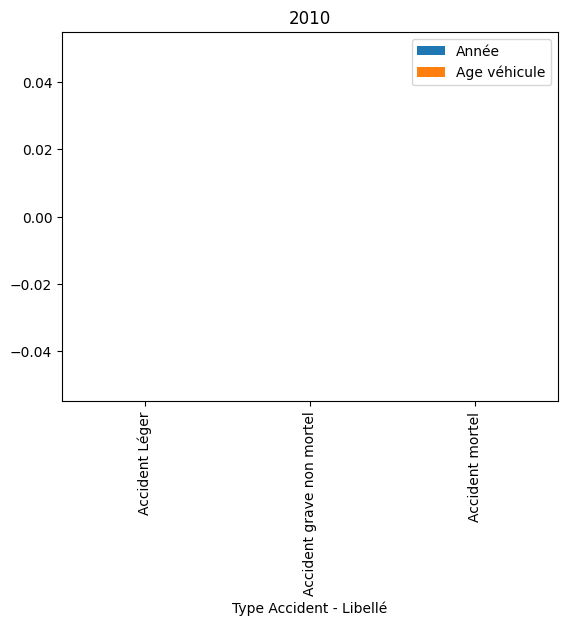

<Figure size 640x480 with 0 Axes>

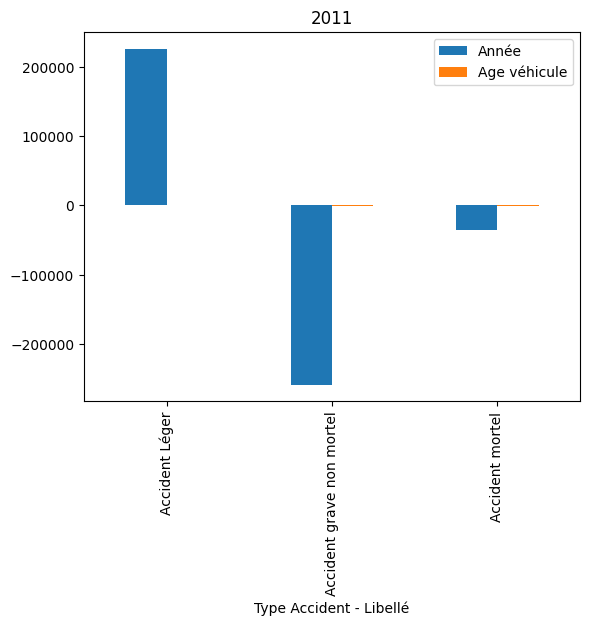

<Figure size 640x480 with 0 Axes>

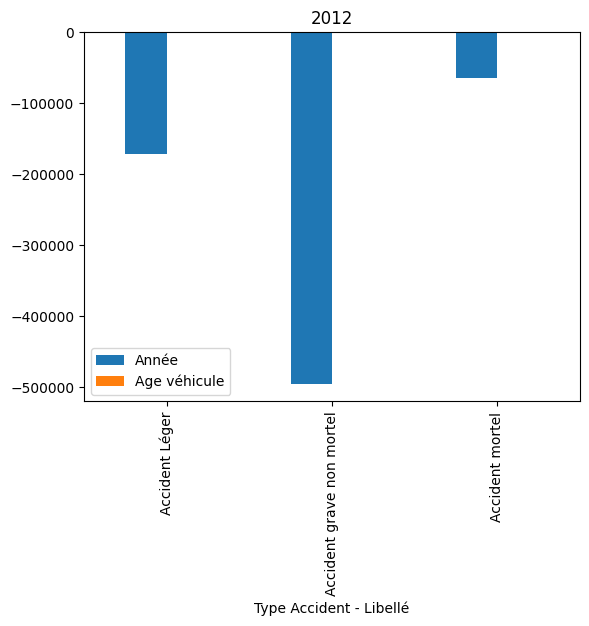

<Figure size 640x480 with 0 Axes>

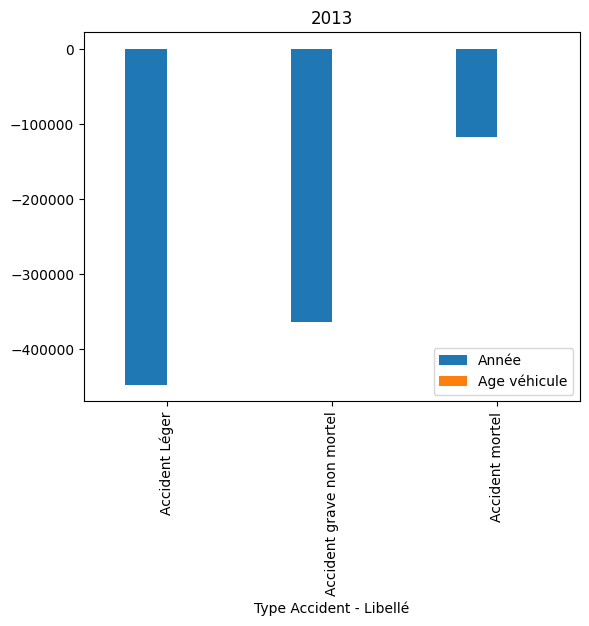

<Figure size 640x480 with 0 Axes>

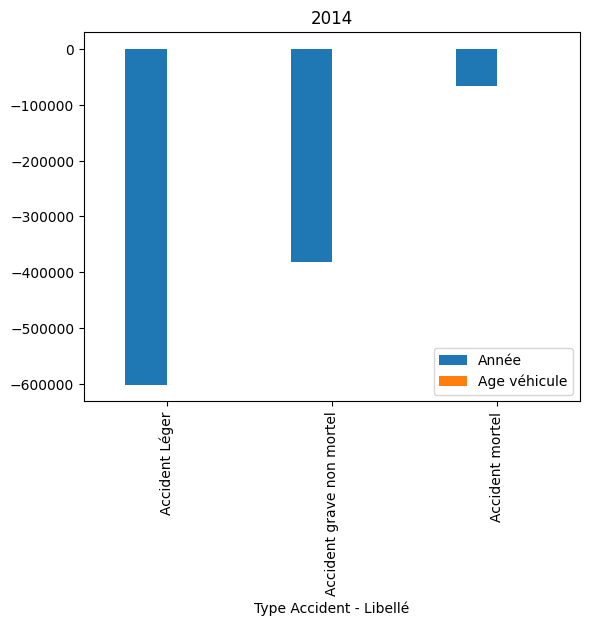

<Figure size 640x480 with 0 Axes>

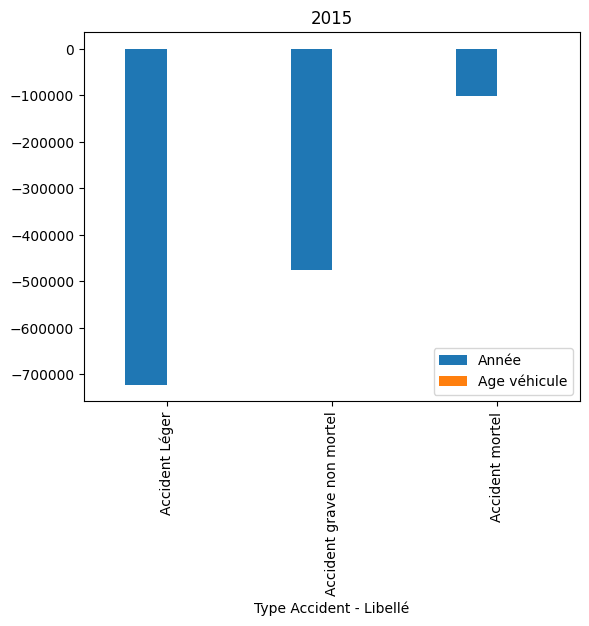

<Figure size 640x480 with 0 Axes>

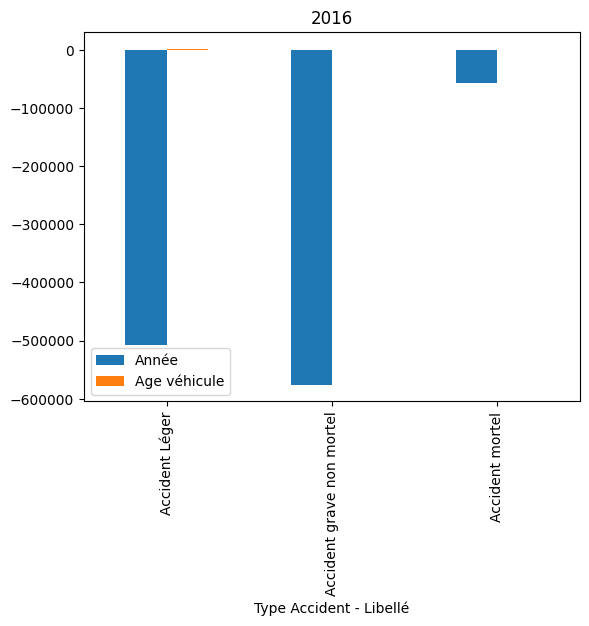

<Figure size 640x480 with 0 Axes>

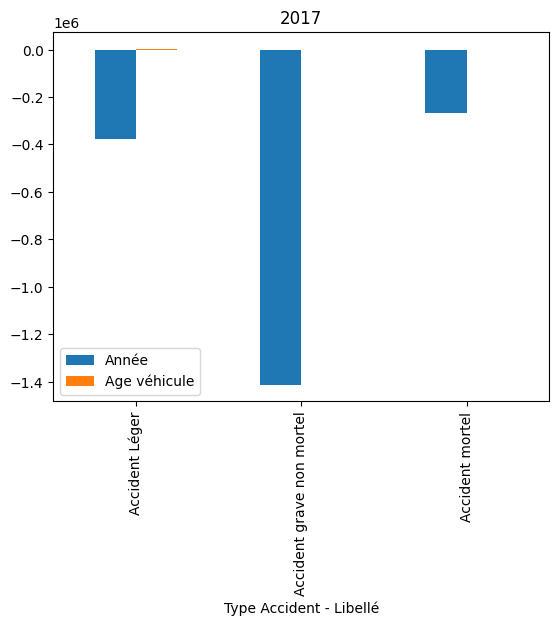

<Figure size 640x480 with 0 Axes>

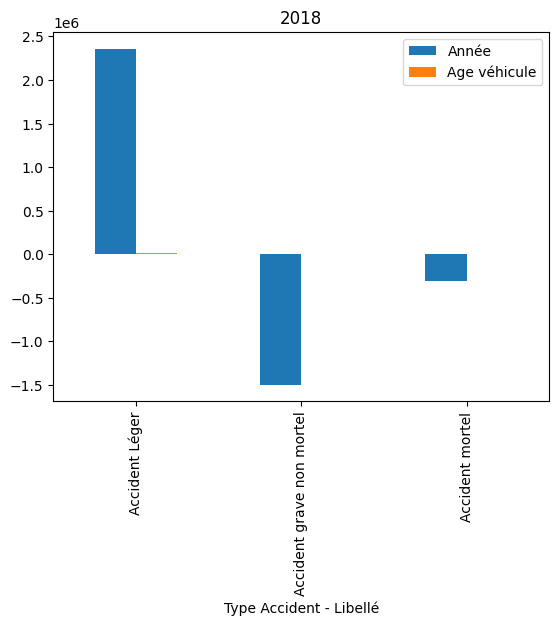

<Figure size 640x480 with 0 Axes>

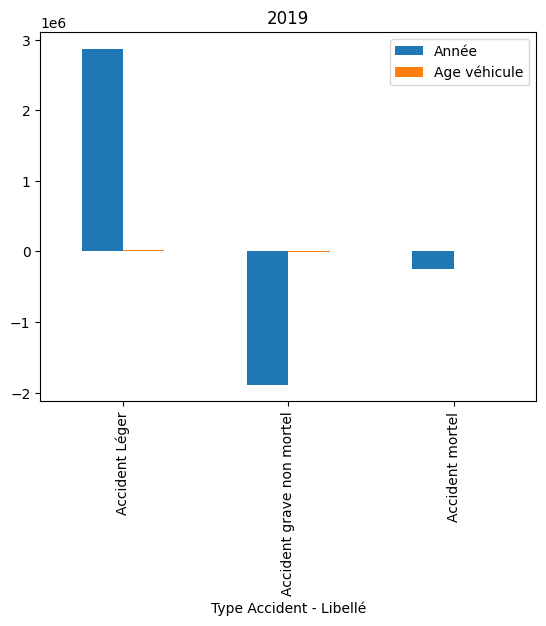

<Figure size 640x480 with 0 Axes>

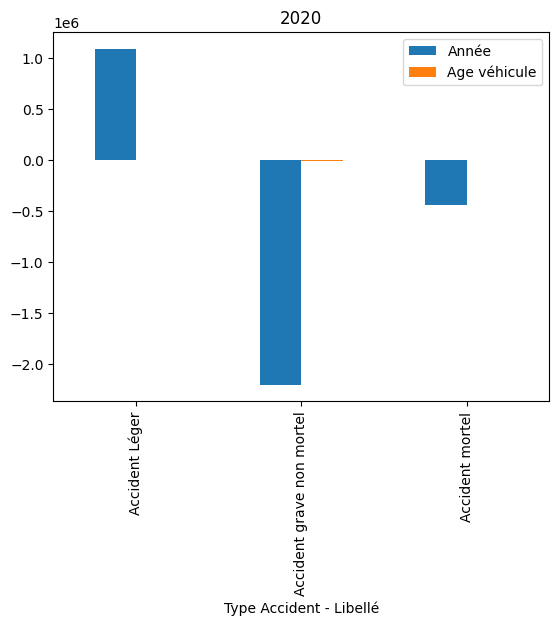

In [299]:
# show histogram of accidents per year from dataframe
# counter of years
counter = 0
for i in ac_p_year_vu_acc:
    #show charts per year in the same figure
    plt.figure()
    ac_p_year_vu_acc_diff[counter].plot.bar(title=year[counter])
    counter += 1


In [286]:
# compare each dataframe from a list of dataframes
def compare_dataframes(dataframe_list):
    return [dataframe_list[i].compare(dataframe_list[i+1]) for i in range(len(dataframe_list)-1)]


In [287]:
#compare accidents per year between years
ac_p_year_vu_acc_diff_compare = compare_dataframes(ac_p_year_vu_acc)

<Figure size 1000x1000 with 0 Axes>

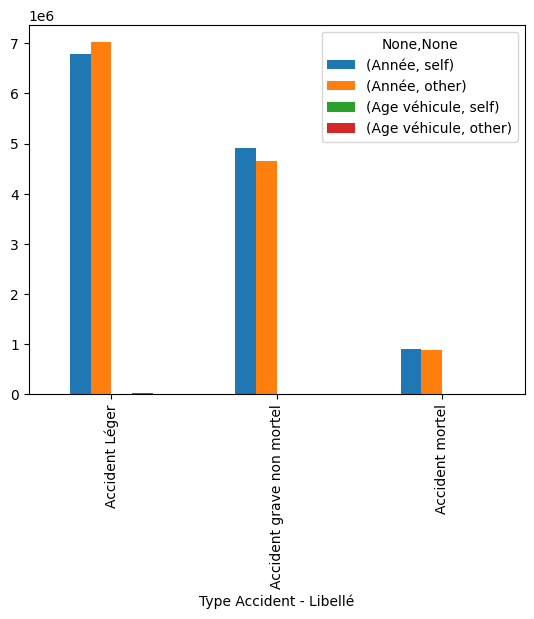

<Figure size 1000x1000 with 0 Axes>

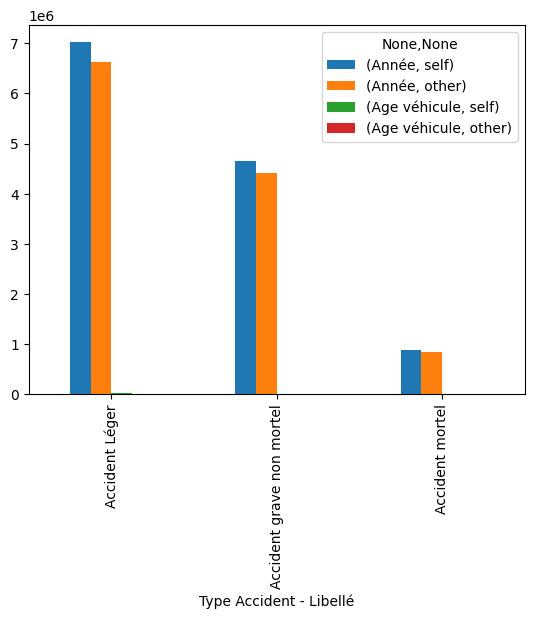

<Figure size 1000x1000 with 0 Axes>

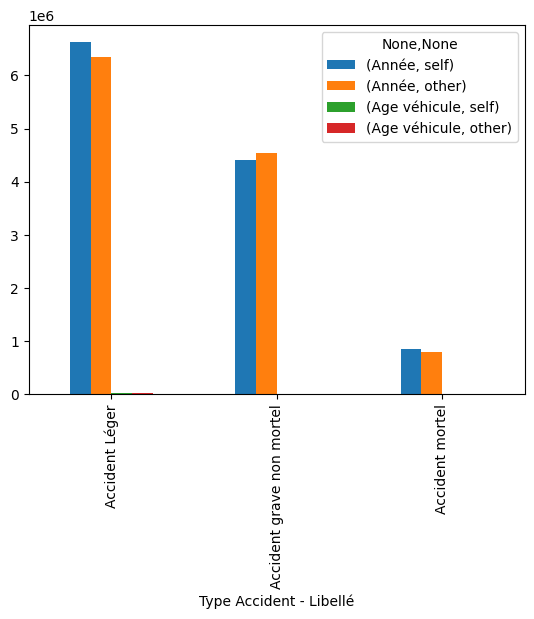

<Figure size 1000x1000 with 0 Axes>

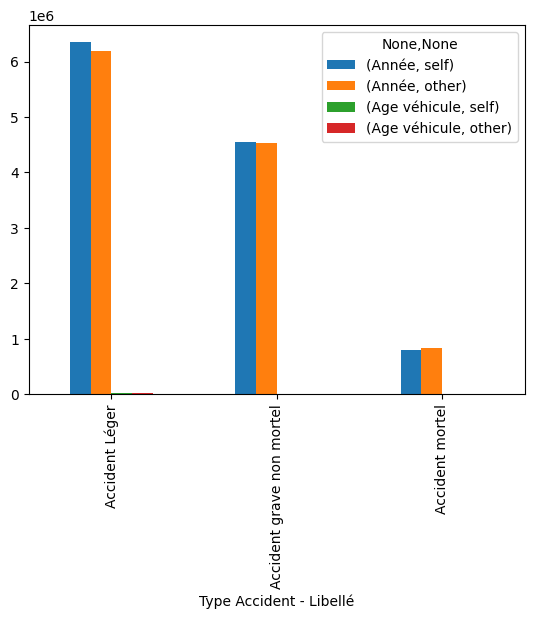

<Figure size 1000x1000 with 0 Axes>

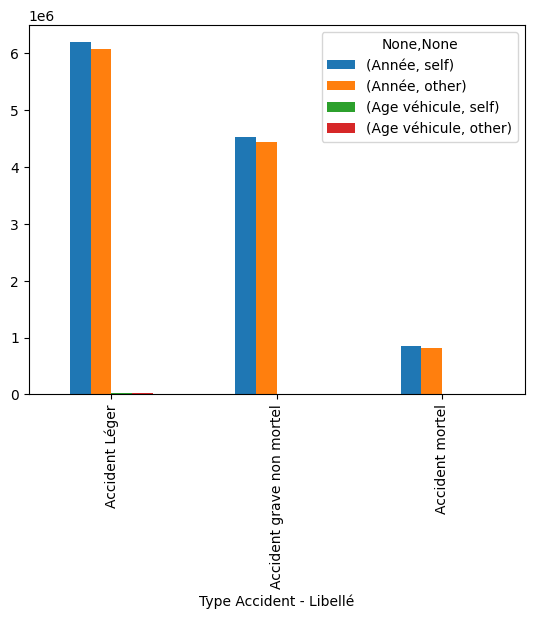

<Figure size 1000x1000 with 0 Axes>

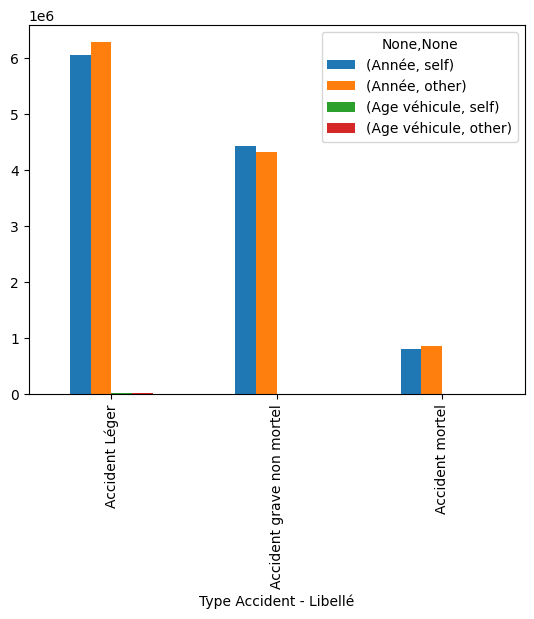

<Figure size 1000x1000 with 0 Axes>

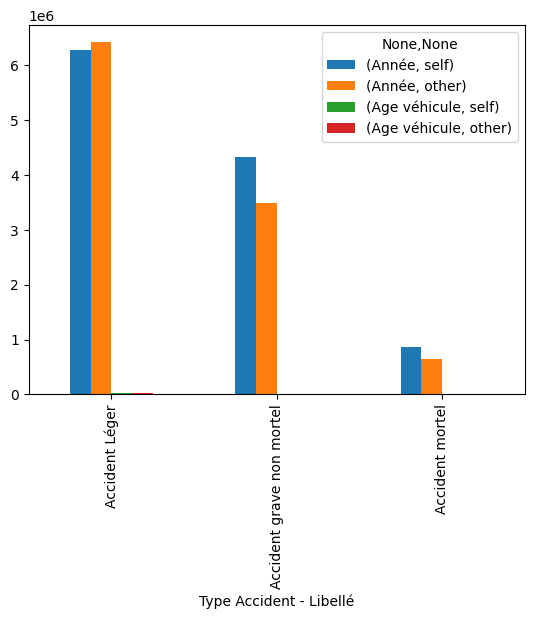

<Figure size 1000x1000 with 0 Axes>

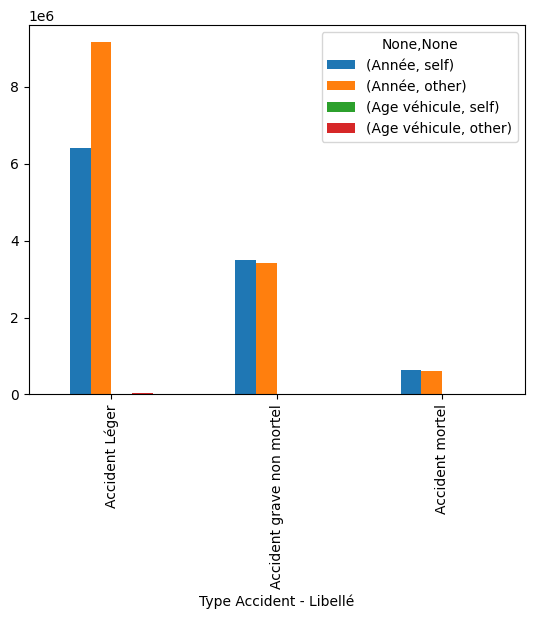

<Figure size 1000x1000 with 0 Axes>

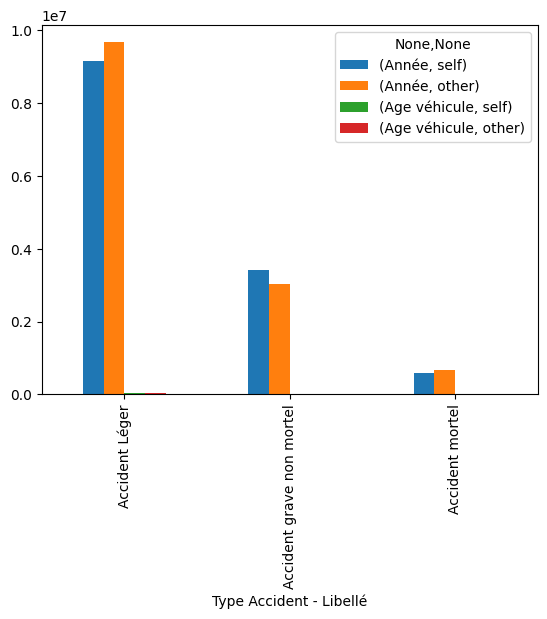

<Figure size 1000x1000 with 0 Axes>

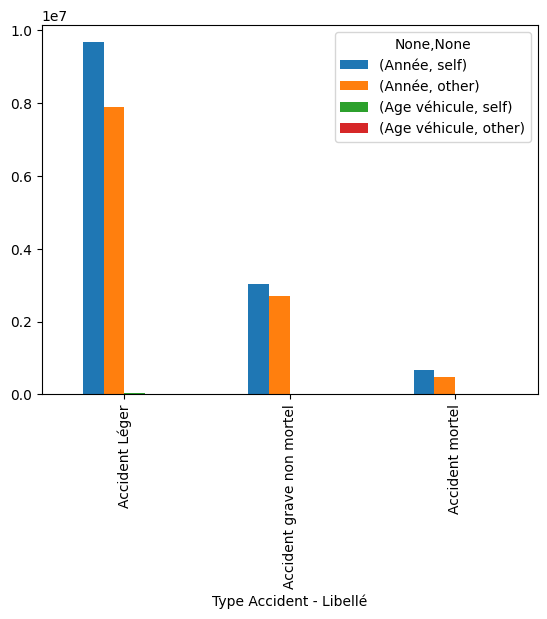

In [290]:
#show comparation of accidents per year between years on a chart
def show_comparation(dataframe_list):
    counter = 0
    for i in dataframe_list:
        # set footer to empty
        plt.figure(figsize=(10, 10))
        plt.suptitle(year[counter] + " vs " + year[counter+1], fontsize=16)
        i.plot.bar()
        counter += 1

show_comparation(ac_p_year_vu_acc_diff_compare)
